In [1]:
import numpy as np
import matplotlib.pyplot as plt

from coin import COIN

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
retention_values = np.linspace(0.8, 1, 500, endpoint=True)
drift_values = np.linspace(-0.1, 0.1, 500, endpoint=True)
state_values = np.linspace(-1.5, 1.5, 500, endpoint=True)
bias_values = np.linspace(-1.5, 1.5, 500, endpoint=True)
state_feedback_values = np.linspace(-1.5, 1.5, 500, endpoint=True)

store = [
    "state_feedback", "motor_output", "responsibilities", 
]

coin_model = COIN(
    retention_values=retention_values, 
    drift_values=drift_values, 
    state_values=state_values, 
    bias_values=bias_values, 
    state_feedback_values=state_feedback_values, 
    store=store, 
) # use default parameters for now
coin_model.perturbations = np.concatenate([
    np.zeros((50, )), 
    np.ones((125, )), 
    -np.ones((15, )), 
    np.ones((150, )) * np.nan, 
])

output = coin_model.simulate_coin()

Simulting the COIN model


  0%|          | 0/1 [00:00<?, ?it/s]/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin.py:617: RuntimeWarning: divide by zero encountered in log
  p_c = np.log(coin_state["prior_probabilities"]) + np.log(coin_state["probability_state_feedback"])
/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/utils/distribution_utils.py:234: RuntimeWarning: invalid value encountered in sqrt
  c = 1.0 / np.sqrt(9*d)
/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin.py:624: RuntimeWarning: divide by zero encountered in log
  p_c = np.log(coin_state["prior_probabilities"])
100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


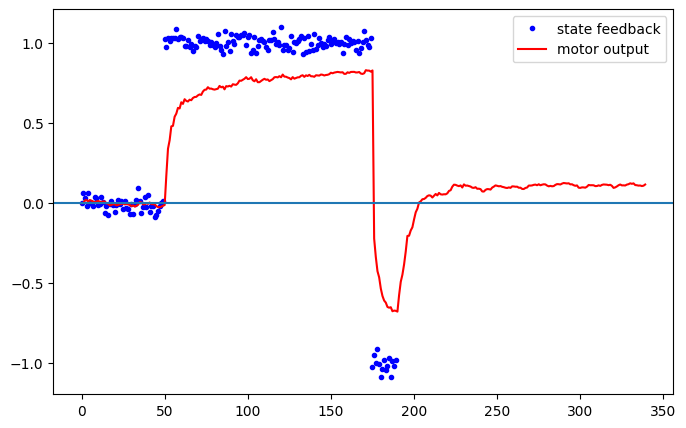

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(output["runs"][0]["state_feedback"], "b.", label="state feedback")
plt.plot(output["runs"][0]["motor_output"], "r", label="motor output")
plt.legend()
plt.axhline(0)